In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#importing the dataset
data = pd.read_csv('water_potability.csv')
data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [27]:
# checking for null values
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [28]:
#checking descriptive statistics results
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [29]:
# defining function for EDA
def conti_var(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,5),tight_layout=True)

    axes[0].set_title('Distribution')
    sns.histplot(x,ax=axes[0])
    axes[0].grid()

    axes[1].set_title('Outliers')
    sns.boxplot(x,ax=axes[1])

    axes[2].set_title('Relation wrt to output variable')
    sns.boxplot(x=data.Potability,y=x)
    axes[2].grid()

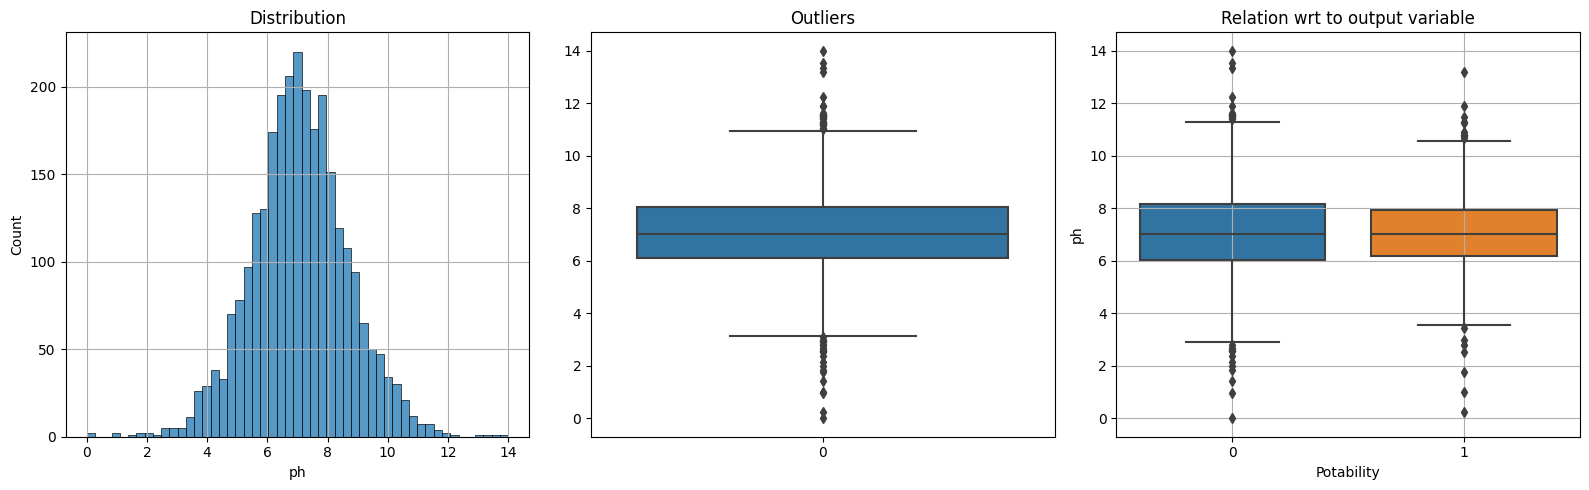

In [30]:
#Analysis of Ph variable
conti_var(data.ph)

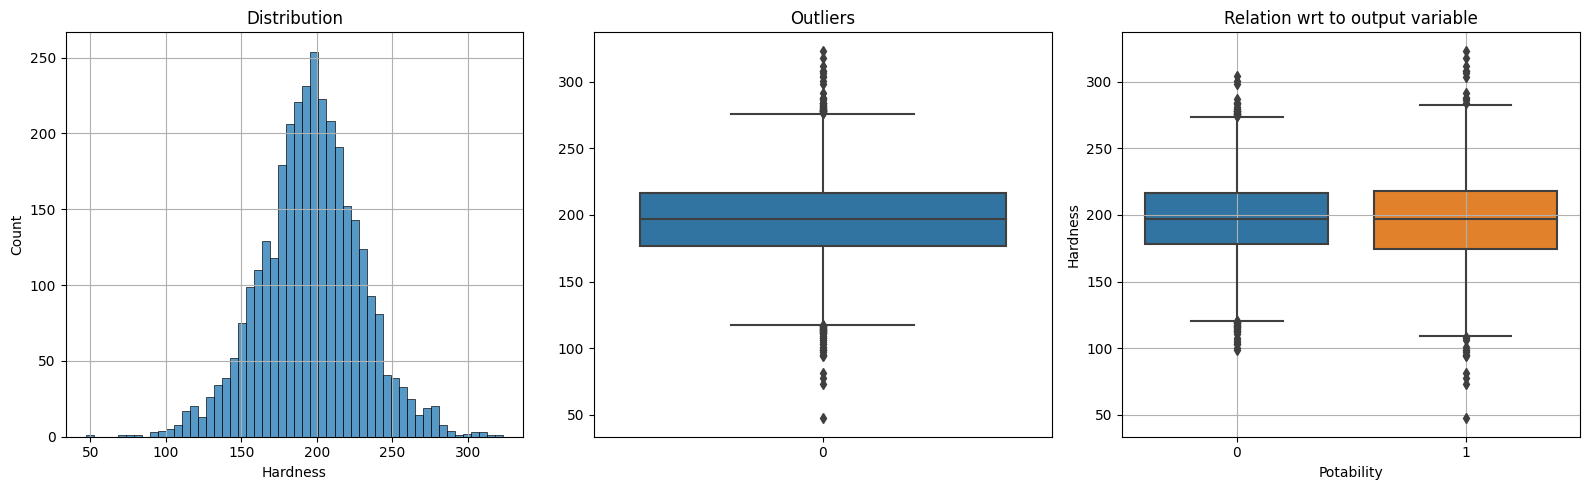

In [31]:
#Analysis of Hardness variable
conti_var(data.Hardness)

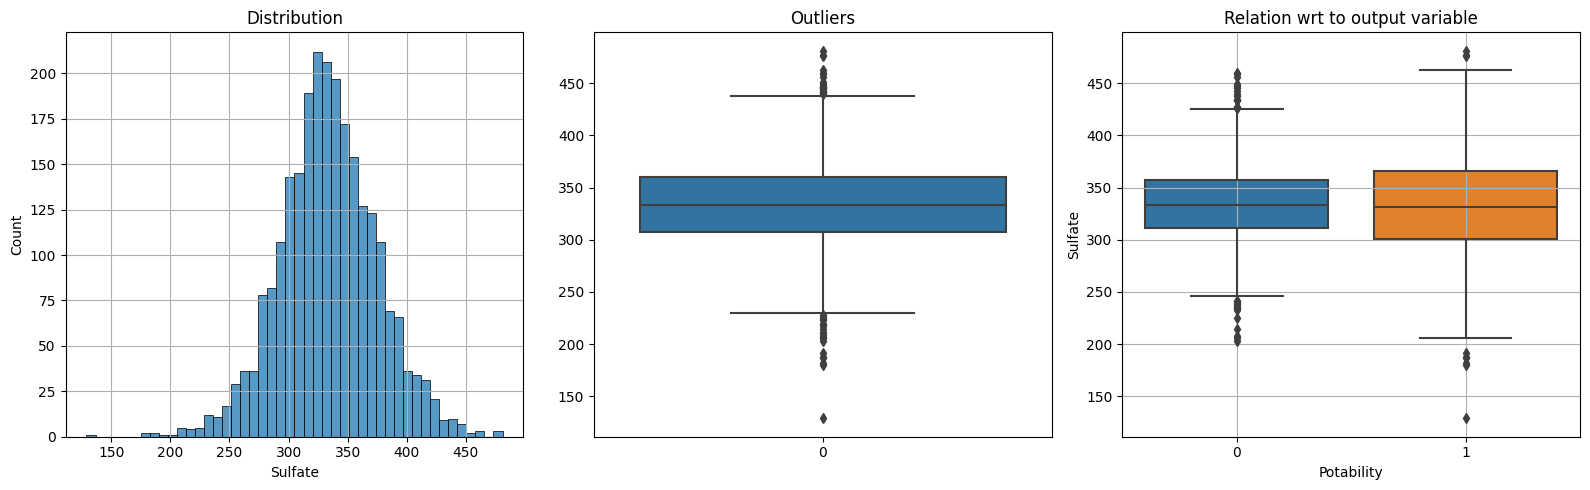

In [32]:
#Analysis of sulfates
conti_var(data.Sulfate)

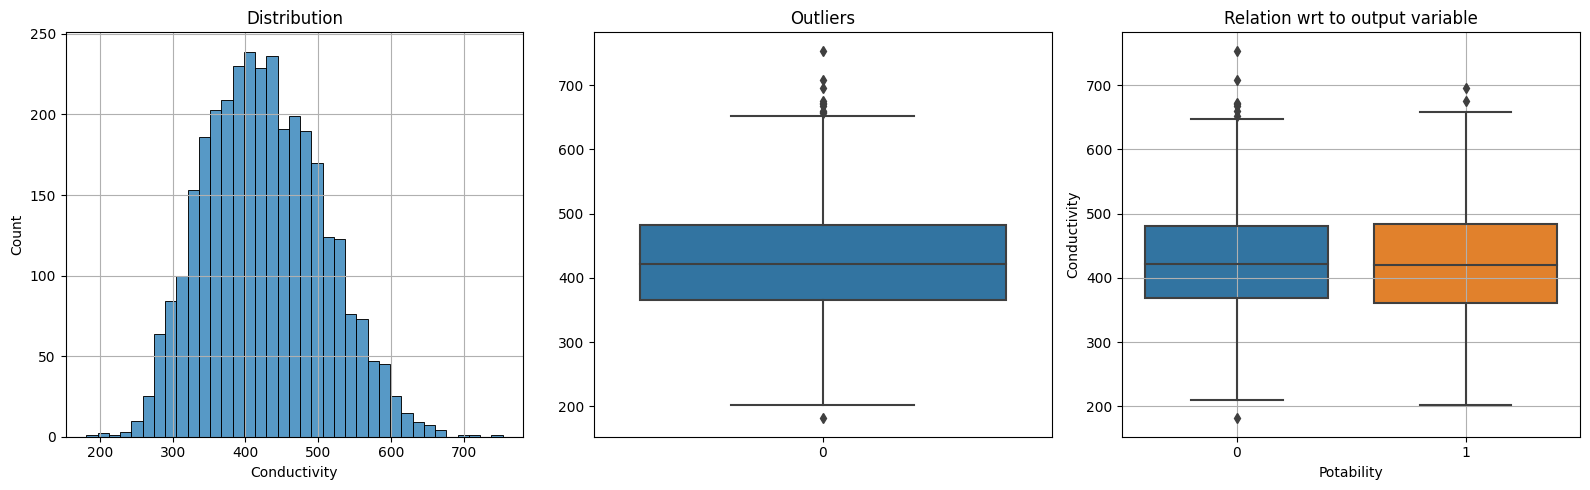

In [33]:
#Analysis of Conductivity variable
conti_var(data.Conductivity)

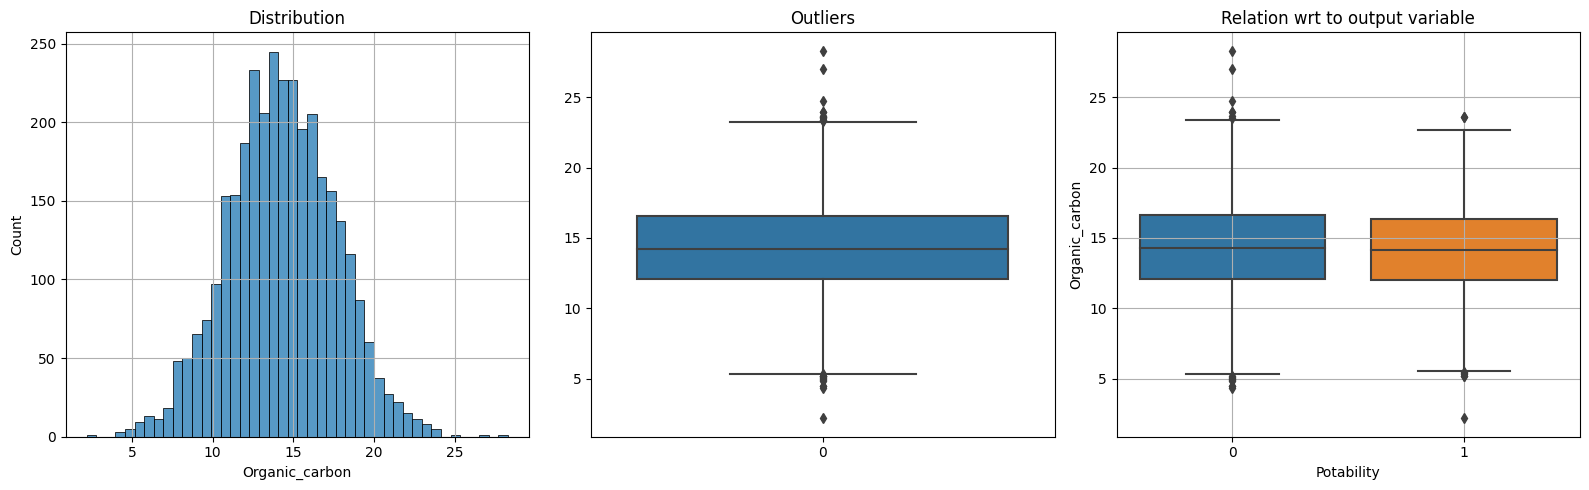

In [34]:
# Analysis of Organic_carbon variable
conti_var(data.Organic_carbon)

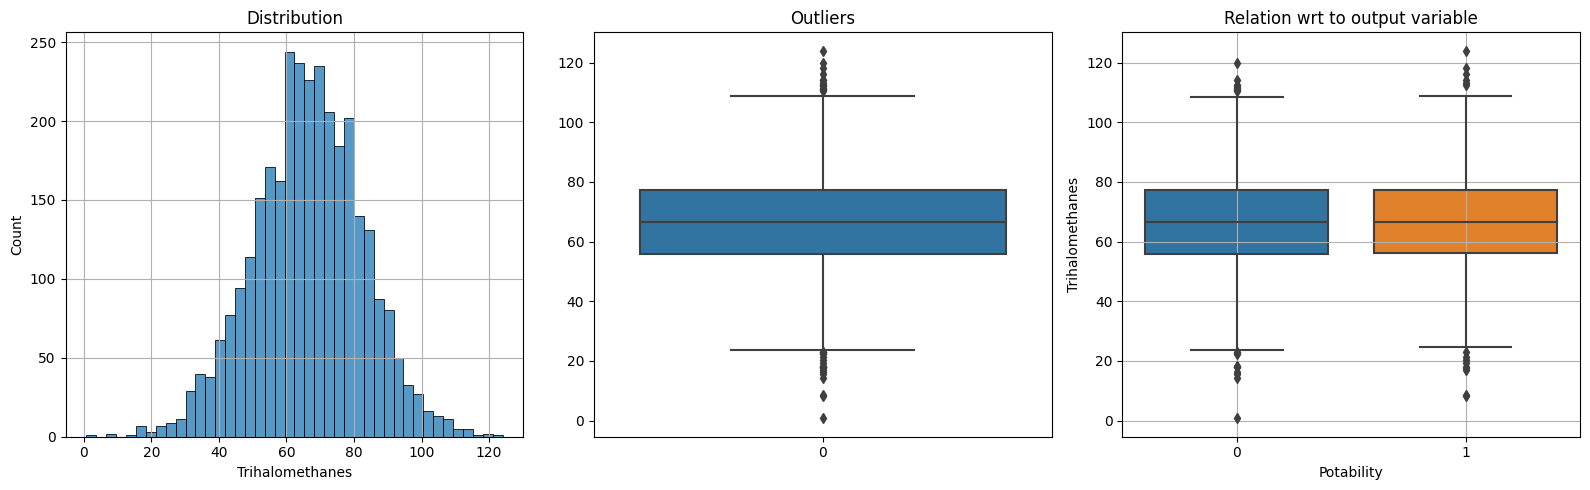

In [35]:
# Analysis of Trihalomethanes variable
conti_var(data.Trihalomethanes)

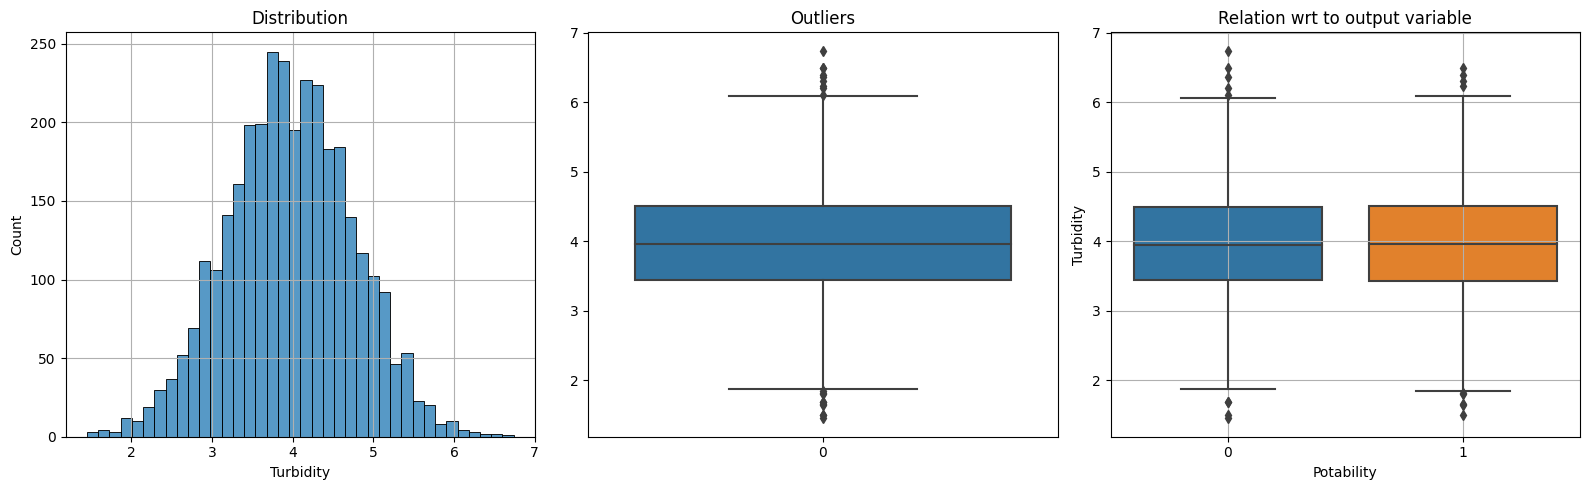

In [36]:
# Analysis of Turbidity variable
conti_var(data.Turbidity)

In [37]:
#checking output variable for unbalanced dataset
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [38]:
# Since Trihalomethanes and pH has less number of missing values, they are inputed with median value
data.ph.fillna(data.ph.median(),inplace=True)
data.Trihalomethanes.fillna(data.Trihalomethanes.median(),inplace=True)

In [39]:
#splitting the data
test_x = data[data.Sulfate.isna()].drop('Sulfate',axis=1)
train_x = data[data.Sulfate.notna()].drop('Sulfate',axis=1)
train_y = data.Sulfate[data.Sulfate.notna()]

#splitting the shape of splitted data
print('train_x = {}, train_y={}, test_x={}'.format(train_x.shape,train_y.shape,test_x.shape))

train_x = (2495, 9), train_y=(2495,), test_x=(781, 9)


In [40]:
#since sulfate variable has more missing values, they are filled with linear regression algorithm
#importing missing values
from sklearn.linear_model import LinearRegression

#initializing the model
lin = LinearRegression()

#fitting the model
lin.fit(train_x,train_y)

#predicting the missing values
for i in data[data.Sulfate.isna()].index:
    data.Sulfate[i] = lin.predict([data.loc[i,data.columns != 'Sulfate']])

c:\Users\study\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\study\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
c:\Users\study\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\study\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

<AxesSubplot:>

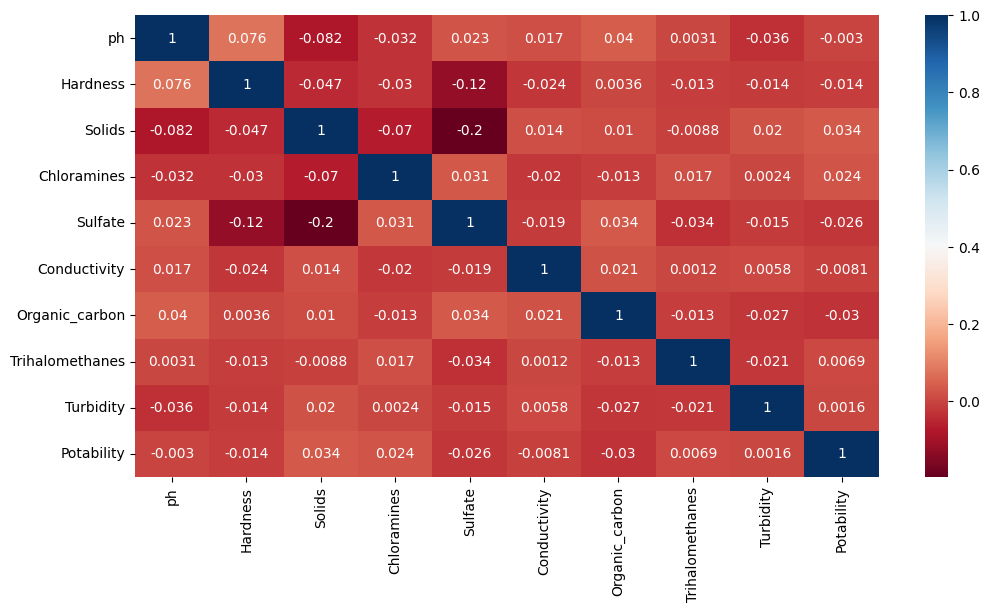

In [41]:
# checking the corealtion
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

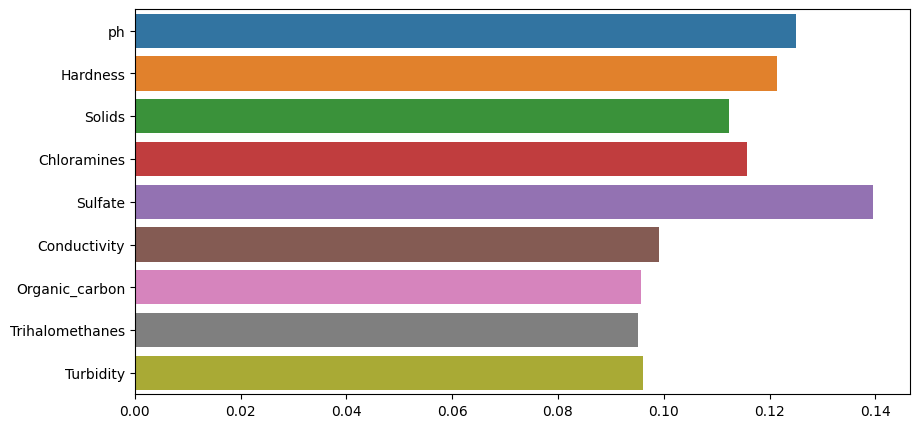

In [42]:
#Feature selection using random forest feature importance
#importing the libraries
from sklearn.ensemble import RandomForestClassifier

#initializing the model
ran = RandomForestClassifier()

#fitting the model
ran.fit(data.drop('Potability',axis=1),data.Potability)

plt.figure(figsize=(10,5))
sns.barplot(x=ran.feature_importances_,y=data.drop('Potability',axis=1).columns)
plt.show()

In [43]:
#splitting the data into input and output
x = data.drop(['Potability','Organic_carbon'],axis=1)
y = data.Potability

print('input shape={}, output shape={}'.format(x.shape,y.shape))

input shape=(3276, 8), output shape=(3276,)


In [44]:
#Standard scalar is used to avoid scaling effect
#importing the libraries
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

#fitting scalar model for input data
x = pd.DataFrame(scalar.fit_transform(x),columns=x.columns)

In [45]:
#splitting entire data into 80% train and 20% test
# importing the libraries
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

print('Shape of Splitting:')
print('x_train={},y_train={},x_test={},y_test={}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting:
x_train=(2620, 8),y_train=(2620,),x_test=(656, 8),y_test=(656,)


**Using logistic regression model to predict potablity**

Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



c:\Users\study\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\study\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\study\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

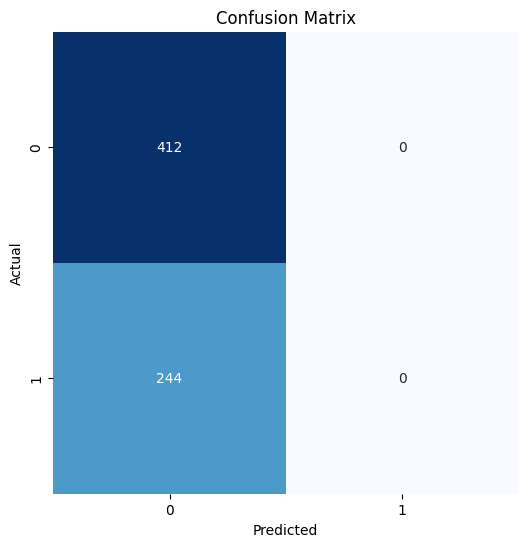

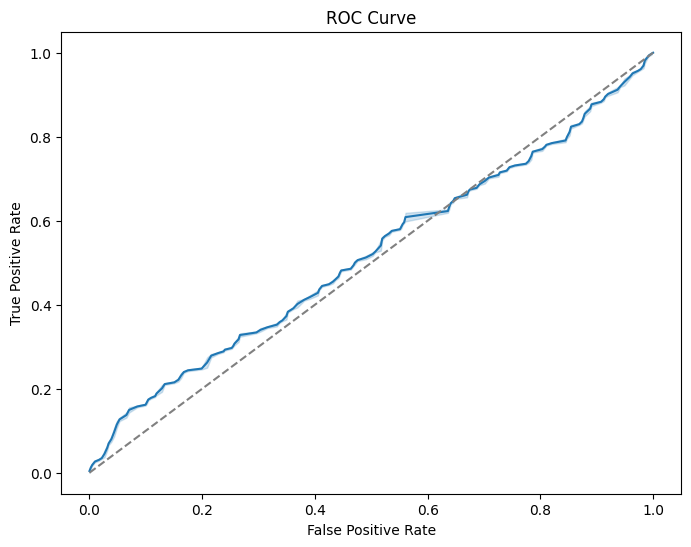

Average Precision: 0.42422398054935084

Prediction for user input:
Potable Water: 0
Probability (Potable): 39.31%
Probability (Not Potable): 60.69%


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc, average_precision_score

# using Logistic regression
X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the model
logis = LogisticRegression()

# Fitting the model
logis.fit(x_train, y_train)

# Predicting for test data
pred_logis = logis.predict(x_test)

# Printing the classification report
print('Classification Report:\n', classification_report(y_test, pred_logis))

# Confusion Matrix using Seaborn

cm = confusion_matrix(y_test, pred_logis)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# ROC Curve using Seaborn

fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Average Precision
average_precision = average_precision_score(y_test, logis.predict_proba(x_test)[:, 1])
print('Average Precision:', average_precision)

# Now, take input from the user for prediction
user_input = {}
for column in X.columns:
    user_input[column] = float(input(f'Enter value for {column}: '))

user_data = pd.DataFrame([user_input])
user_prediction = logis.predict(user_data)
user_probabilities = logis.predict_proba(user_data)

print('\nPrediction for user input:')
print(f'Potable Water: {user_prediction[0]}')
print(f'Probability (Potable): {user_probabilities[0, 1]:.2%}')
print(f'Probability (Not Potable): {user_probabilities[0, 0]:.2%}')

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.90      0.79       412
           1       0.67      0.35      0.46       244

    accuracy                           0.69       656
   macro avg       0.68      0.62      0.62       656
weighted avg       0.69      0.69      0.67       656



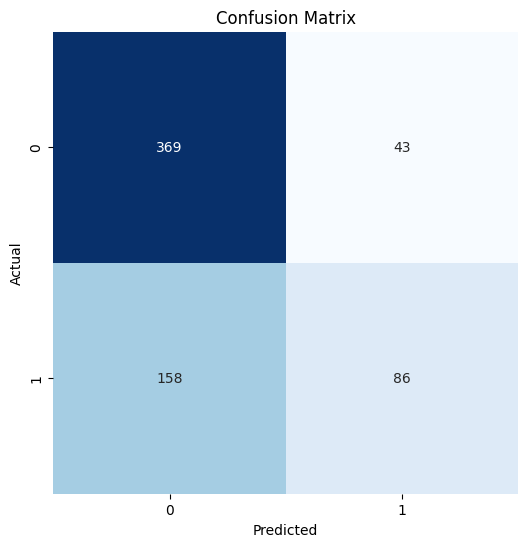

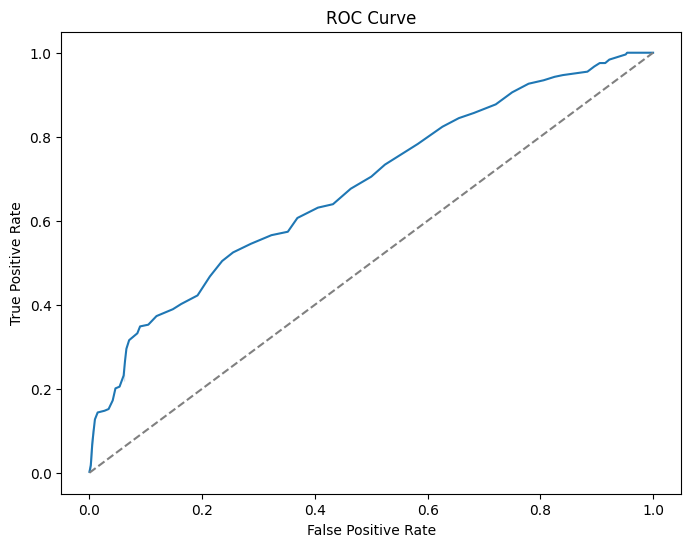

Average Precision: 0.5857100228750662

Prediction for user input:
Potable Water: 0
Probability (Potable): 46.00%
Probability (Not Potable): 54.00%


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, average_precision_score

#using Random-Classifier
X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']  # Assuming 'Potability' is the column name for your target variable

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the model
rand = RandomForestClassifier()

# Fitting and predicting for test data
pred_rand = rand.fit(x_train, y_train).predict(x_test)

# Printing the classification report
print('Classification Report:\n', classification_report(y_test, pred_rand))

# Confusion Matrix using Seaborn
cm = confusion_matrix(y_test, pred_rand)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve using Seaborn
fpr, tpr, thresholds = roc_curve(y_test, rand.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Average Precision
average_precision = average_precision_score(y_test, rand.predict_proba(x_test)[:, 1])
print('Average Precision:', average_precision)

# Now, take input from the user for prediction
user_input = {}
for column in X.columns:
    user_input[column] = float(input(f'Enter value for {column}: '))

user_data = pd.DataFrame([user_input])
user_prediction = rand.predict(user_data)
user_probabilities = rand.predict_proba(user_data)

print('\nPrediction for user input:')
print(f'Potable Water: {user_prediction[0]}')
print(f'Probability (Potable): {user_probabilities[0, 1]:.2%}')
print(f'Probability (Not Potable): {user_probabilities[0, 0]:.2%}')


**Predicting Filter values**

In [26]:
#Sand Filter
#Read the dataset
df = pd.read_csv('sanddata.csv')
df

,Turbidity,Filter_area,Filter_cost,Solids
0,2.963135,13.33,66.65,20791.31898
1,4.500656,20.25,101.25,18630.05786
2,3.055934,13.75,68.75,19909.54173
3,4.628771,20.83,104.15,22018.41744
4,4.075075,18.34,91.70,17978.98634
...,...,...,...,...
194,2.718398,12.23,61.15,23590.93213
195,2.951645,13.28,66.40,20571.84571
196,3.355490,15.10,75.50,15326.85591
197,4.726845,21.27,106.35,35370.73552


c:\Users\study\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\study\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Predicted Filter Area for Turbidity 1.0 and Solids 20200.0: 4.499758040897817
Predicted Filter Cost for Turbidity 1.0 and Solids 20200.0: 22.49879020448908
Mean Squared Error for Filter Cost: 0.00022851407015432547
Mean Squared Error for Filter Area: 9.140562806169589e-06


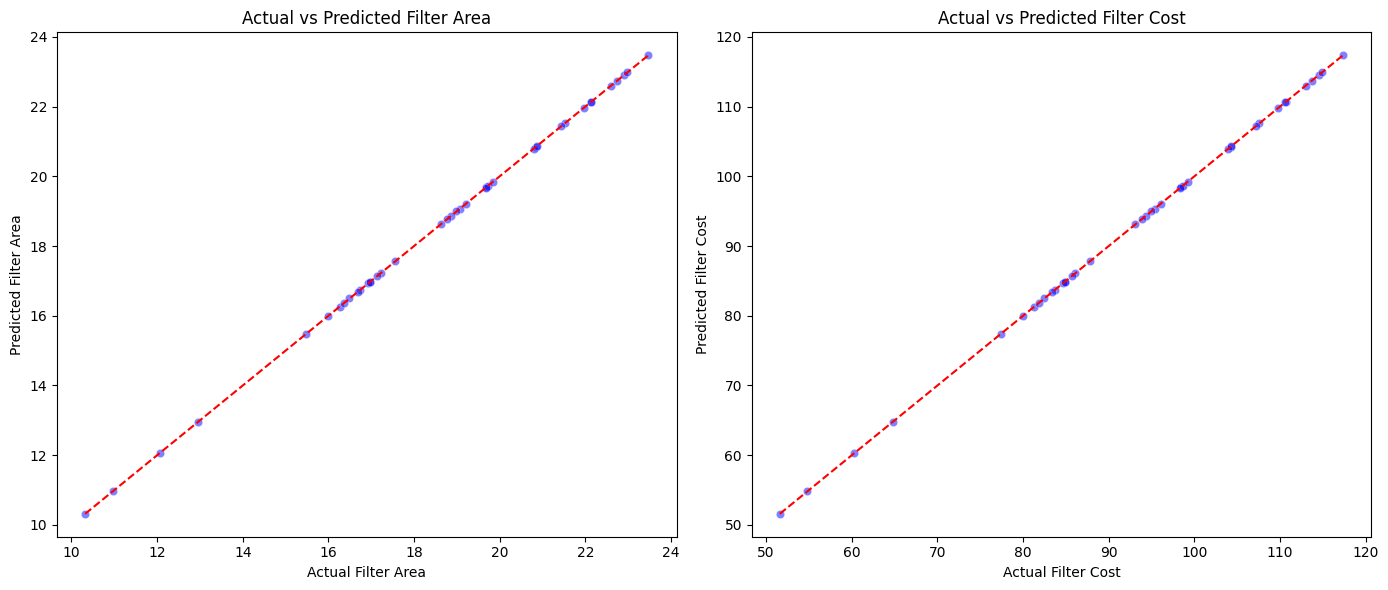

In [27]:
# Read the dataset
df = pd.read_csv('sanddata.csv')

# Add 'Solids' as an additional feature to X
X = df[['Turbidity', 'Solids']]

# Split the dataset into features (X) and target variables (y_area and y_cost)
y_area = df['Filter_area']
y_cost = df['Filter_cost']

# Split the data into training and testing sets
X_train, X_test, y_area_train, y_area_test, y_cost_train, y_cost_test = train_test_split(
    X, y_area, y_cost, test_size=0.2, random_state=42)

if len(X_train) < 2 or len(X_test) < 1:
    print("Not enough data points for training and testing. Please check your dataset.")
else:
    # Train a linear regression model for filter area
    area_model = LinearRegression()
    area_model.fit(X_train, y_area_train)

    # Make predictions on the test set for filter area
    y_area_pred = area_model.predict(X_test)


    # Take input from the user for new values
    new_turbidity = float(input('Enter a new turbidity value: '))
    new_solids = float(input('Enter a new solids value: '))

    # Predict filter area for the new values
    predicted_area = area_model.predict([[new_turbidity, new_solids]])[0]
    print(f'Predicted Filter Area for Turbidity {new_turbidity} and Solids {new_solids}: {predicted_area}')

    # Train a linear regression model for filter cost
    cost_model = LinearRegression()
    cost_model.fit(X_train, y_cost_train)

    # Predict filter cost for the new values
    predicted_cost = cost_model.predict([[new_turbidity, new_solids]])[0]
    print(f'Predicted Filter Cost for Turbidity {new_turbidity} and Solids {new_solids}: {predicted_cost}')

    # Evaluate the model for filter cost
    y_cost_pred = cost_model.predict(X_test)
    mse_cost = mean_squared_error(y_cost_test, y_cost_pred)
    print(f'Mean Squared Error for Filter Cost: {mse_cost}')

     # Evaluate the model for filter area
    mse_area = mean_squared_error(y_area_test, y_area_pred)
    print(f'Mean Squared Error for Filter Area: {mse_area}')


    # Scatter plot for filter area
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_area_test, y=y_area_pred, color='blue', alpha=0.5)
    plt.plot([min(y_area_test), max(y_area_test)], [min(y_area_test), max(y_area_test)], linestyle='--', color='red')
    plt.title('Actual vs Predicted Filter Area')
    plt.xlabel('Actual Filter Area')
    plt.ylabel('Predicted Filter Area')

    # Scatter plot for filter cost
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_cost_test, y=y_cost_pred, color='blue', alpha=0.5)
    plt.plot([min(y_cost_test), max(y_cost_test)], [min(y_cost_test), max(y_cost_test)], linestyle='--', color='red')
    plt.title('Actual vs Predicted Filter Cost')
    plt.xlabel('Actual Filter Cost')
    plt.ylabel('Predicted Filter Cost')

    plt.tight_layout()
    plt.show()

In [28]:
#predicting the carbon filter
# Load the 'carbondata.csv' dataset
carbon_df = pd.read_csv('carbondata.csv')
carbon_df

,Chloramines,Trihalomethanes,carbon_req,filter_radius,cost
0,7.300212,86.990970,0.918578,0.382356,551.146670
1,6.635246,56.329076,0.607526,0.310951,364.515441
2,9.275884,66.420093,0.726040,0.339931,435.624090
3,8.059332,100.341674,1.057146,0.410183,634.287376
4,6.546600,31.997993,0.363624,0.240567,218.174356
...,...,...,...,...,...
195,8.984237,25.525267,0.315148,0.223958,189.088549
196,3.351598,83.923168,0.861576,0.370303,516.945400
197,7.989641,63.016018,0.683424,0.329804,410.054668
198,7.761431,56.635811,0.618101,0.313646,370.860592


c:\Users\study\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\study\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Predicted Carbon Filter Radius for Trihalomethanes 90.0 and Chloramines 8.0: 0.39291439513603077
Predicted Carbon Filter Cost for Trihalomethanes 90.0 and Chloramines 8.0: 571.9999999973096


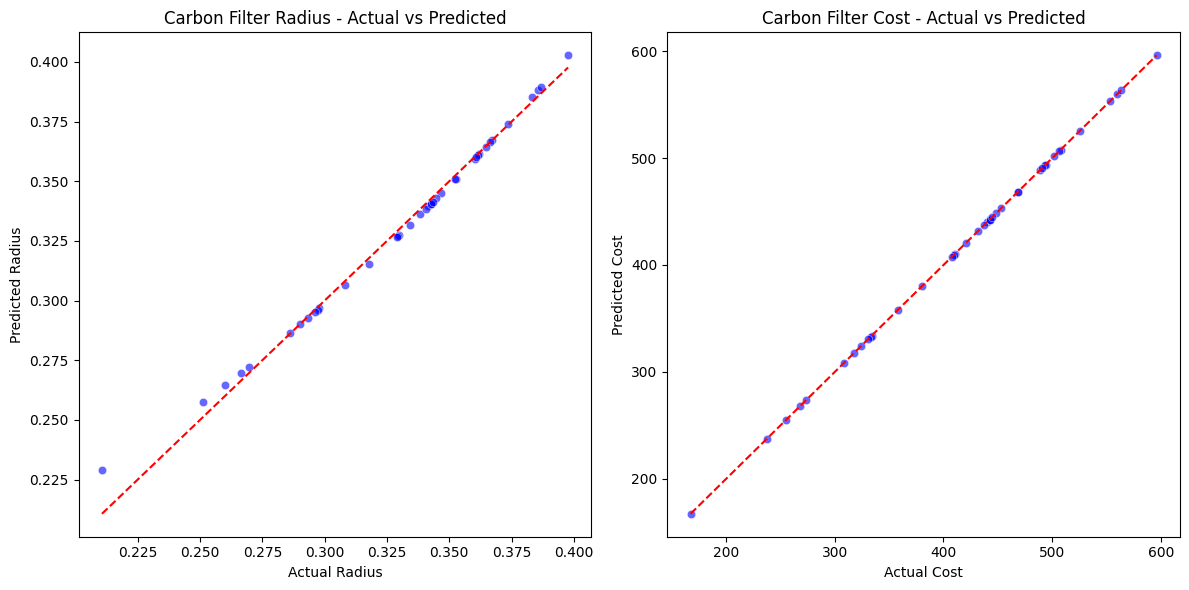

In [29]:
# Define features (X) and target variables (y_radius and y_cost)
X_carbon = carbon_df[['Trihalomethanes', 'Chloramines']]
y_radius_carbon = carbon_df['filter_radius']
y_cost_carbon = carbon_df['cost']

# Split the dataset into training and testing sets for carbon filter radius and cost
X_train_radius_carbon, X_test_radius_carbon, y_radius_train_carbon, y_radius_test_carbon = train_test_split(
    X_carbon, y_radius_carbon, test_size=0.2, random_state=42)

X_train_cost_carbon, X_test_cost_carbon, y_cost_train_carbon, y_cost_test_carbon = train_test_split(
    X_carbon, y_cost_carbon, test_size=0.2, random_state=42)

# Train linear regression models for carbon filter radius and cost
radius_model_carbon = LinearRegression()
radius_model_carbon.fit(X_train_radius_carbon, y_radius_train_carbon)

cost_model_carbon = LinearRegression()
cost_model_carbon.fit(X_train_cost_carbon, y_cost_train_carbon)

# Make predictions on the test set for carbon filter radius and cost
y_radius_pred_carbon = radius_model_carbon.predict(X_test_radius_carbon)
y_cost_pred_carbon = cost_model_carbon.predict(X_test_cost_carbon)

# Evaluate the models for carbon filter radius and cost
mse_radius_carbon = mean_squared_error(y_radius_test_carbon, y_radius_pred_carbon)
mse_cost_carbon = mean_squared_error(y_cost_test_carbon, y_cost_pred_carbon)


user_trihalomethanes = float(input('Enter the trihalomethanes concentration: '))
user_chloramines = float(input('Enter the chloramines concentration: '))

# Combine user inputs as a single feature
user_combined_feature = [[user_trihalomethanes, user_chloramines]]

# Predict carbon filter radius and cost for the user input values
predicted_radius_carbon = radius_model_carbon.predict(user_combined_feature)[0]
predicted_cost_carbon = cost_model_carbon.predict(user_combined_feature)[0]

print(f'Predicted Carbon Filter Radius for Trihalomethanes {user_trihalomethanes} and Chloramines {user_chloramines}: {predicted_radius_carbon}')
print(f'Predicted Carbon Filter Cost for Trihalomethanes {user_trihalomethanes} and Chloramines {user_chloramines}: {predicted_cost_carbon}')

# Visualize accuracy using scatter plots with regression lines
plt.figure(figsize=(12, 6))

# Scatter plot for Carbon Filter Radius
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_radius_test_carbon, y=y_radius_pred_carbon, color='blue', alpha=0.6)
#sns.regplot(x=y_radius_test_carbon, y=y_radius_pred_carbon, scatter=False, color='red')
plt.plot([min(y_radius_test_carbon), max(y_radius_test_carbon)], [min(y_radius_test_carbon), max(y_radius_test_carbon)], linestyle='--', color='red')
plt.title('Carbon Filter Radius - Actual vs Predicted')
plt.xlabel('Actual Radius')
plt.ylabel('Predicted Radius')

# Scatter plot for Carbon Filter Cost
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_cost_test_carbon, y=y_cost_pred_carbon, color='blue', alpha=0.6)
#sns.regplot(x=y_cost_test_carbon, y=y_cost_pred_carbon, scatter=False, color='red')
plt.plot([min(y_cost_test_carbon), max(y_cost_test_carbon)], [min(y_cost_test_carbon), max(y_cost_test_carbon)], linestyle='--', color='red')
plt.title('Carbon Filter Cost - Actual vs Predicted')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')

plt.tight_layout()
plt.show()

In [30]:
#ULTRAFILTERATION FILTER(85%)
ultrafiltration_df = pd.read_csv('ultrafilterationdata.csv')
ultrafiltration_df

,Colloidal_silica,Membrane_area,Membrane_cost
0,368.516441,2649.809598,204194.327622
1,356.886136,2566.182133,197749.995169
2,310.135738,2230.024395,171845.679879
3,326.678363,2348.973789,181011.920180
4,393.663395,2830.628235,218128.211789
...,...,...,...
194,323.199076,2323.956055,179084.053598
195,308.482695,2218.138231,170929.732081
196,374.232961,2690.914108,207361.841162
197,278.742296,2004.290527,154450.628011


Mean Squared Error for Ultrafiltration Filter Area: 1.102940656793186e-21


c:\Users\study\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\study\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Predicted Ultrafiltration Filter Area for Colloidal Silica 98.0: 704.6669062587615
Mean Squared Error for Ultrafiltration Filter Cost: 4.563961113985281e-10
Predicted Ultrafiltration Filter Cost for Colloidal Silica 98.0: 5430.163182487233


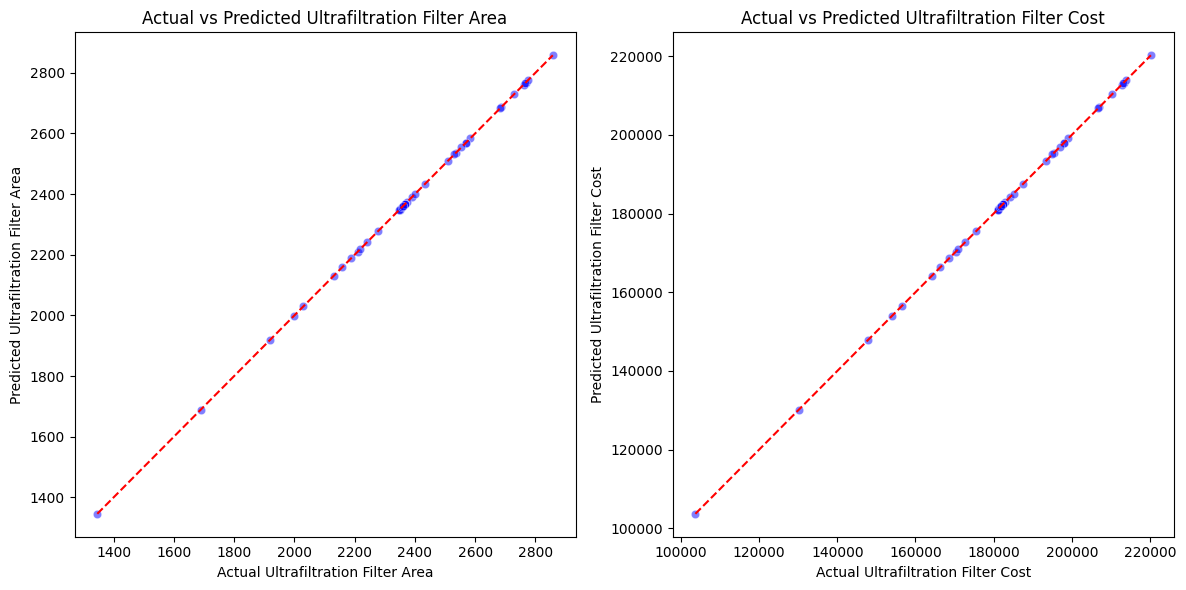

In [31]:
# Assuming ultrafiltration_df is your DataFrame for ultrafiltration data
# Split the dataset into features (X_ultrafiltration) and target variables (y_area_ultrafiltration and y_cost_ultrafiltration)
X_ultrafiltration = ultrafiltration_df[['Colloidal_silica']]
y_area_ultrafiltration = ultrafiltration_df['Membrane_area']
y_cost_ultrafiltration = ultrafiltration_df['Membrane_cost']

# Split the data into training and testing sets for ultrafiltration filter
X_train_ultrafiltration, X_test_ultrafiltration, y_area_train_ultrafiltration, y_area_test_ultrafiltration, y_cost_train_ultrafiltration, y_cost_test_ultrafiltration = train_test_split(
    X_ultrafiltration, y_area_ultrafiltration, y_cost_ultrafiltration, test_size=0.2, random_state=42)

# Train a linear regression model for ultrafiltration filter area
area_model_ultrafiltration = LinearRegression()
area_model_ultrafiltration.fit(X_train_ultrafiltration, y_area_train_ultrafiltration)

# Make predictions on the test set for ultrafiltration filter area
y_area_pred_ultrafiltration = area_model_ultrafiltration.predict(X_test_ultrafiltration)

# Evaluate the model for ultrafiltration filter area
mse_area_ultrafiltration = mean_squared_error(y_area_test_ultrafiltration, y_area_pred_ultrafiltration)
print(f'Mean Squared Error for Ultrafiltration Filter Area: {mse_area_ultrafiltration}')

# Take input from the user for colloidal silica value
user_colloidal_silica = float(input('Enter the colloidal silica value: '))

# Predict ultrafiltration filter area for the user input value
predicted_area_ultrafiltration = area_model_ultrafiltration.predict([[user_colloidal_silica]])[0]
print(f'Predicted Ultrafiltration Filter Area for Colloidal Silica {user_colloidal_silica}: {predicted_area_ultrafiltration}')

# Train a linear regression model for ultrafiltration filter cost
cost_model_ultrafiltration = LinearRegression()
cost_model_ultrafiltration.fit(X_train_ultrafiltration, y_cost_train_ultrafiltration)

# Make predictions on the test set for ultrafiltration filter cost
y_cost_pred_ultrafiltration = cost_model_ultrafiltration.predict(X_test_ultrafiltration)

# Evaluate the model for ultrafiltration filter cost
mse_cost_ultrafiltration = mean_squared_error(y_cost_test_ultrafiltration, y_cost_pred_ultrafiltration)
print(f'Mean Squared Error for Ultrafiltration Filter Cost: {mse_cost_ultrafiltration}')

# Predict ultrafiltration filter cost for the user input value
predicted_cost_ultrafiltration = cost_model_ultrafiltration.predict([[user_colloidal_silica]])[0]
print(f'Predicted Ultrafiltration Filter Cost for Colloidal Silica {user_colloidal_silica}: {predicted_cost_ultrafiltration/10}')

# Scatter plots for ultrafiltration filter area and cost side by side
plt.figure(figsize=(12, 6))

# Scatter plot for ultrafiltration filter area
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_area_test_ultrafiltration, y=y_area_pred_ultrafiltration, color='blue', alpha=0.5)
plt.plot([min(y_area_test_ultrafiltration), max(y_area_test_ultrafiltration)], [min(y_area_test_ultrafiltration), max(y_area_test_ultrafiltration)], linestyle='--', color='red')
plt.title('Actual vs Predicted Ultrafiltration Filter Area')
plt.xlabel('Actual Ultrafiltration Filter Area')
plt.ylabel('Predicted Ultrafiltration Filter Area')

# Scatter plot for ultrafiltration filter cost
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_cost_test_ultrafiltration, y=y_cost_pred_ultrafiltration, color='blue', alpha=0.5)
plt.plot([min(y_cost_test_ultrafiltration), max(y_cost_test_ultrafiltration)], [min(y_cost_test_ultrafiltration), max(y_cost_test_ultrafiltration)], linestyle='--', color='red')
plt.title('Actual vs Predicted Ultrafiltration Filter Cost')
plt.xlabel('Actual Ultrafiltration Filter Cost')
plt.ylabel('Predicted Ultrafiltration Filter Cost')

plt.tight_layout()
plt.show()